# LangChain

LangCain is software that enables the development of applications based on LLMs. Since all models/providers/inference servers have a slightly it different input/ouput format. Langchain builds a set of unified APIs. The same or nearly the same code can be used to build systems with different models and their hosting principles.

There is a set of packages that implement a typical integrations of the langchain. The following table lists the most typical of them.

| Package Name | Description |
| :--- | :--- |
| `langchain-community` | A general package for a wide variety of community-contributed tools and integrations, including web search (DuckDuckGo, Tavily), Python REPL, and various database connectors. |
| `langchain-core` | The foundational package with the core tool abstractions and base classes. |
| `langchain-experimental` | A package for new and experimental tools, which may not yet be stable. |
| `langchain-tavily` | A dedicated package for the Tavily search tool. |
| `langchain-brave-search` | A dedicated package for the Brave Search tool. |
| `langchain-google-genai` | Includes tools for interacting with Google's Generative AI services. |
| `langchain-anthropic` | Includes tools for interacting with the Anthropic API. |
| `langchain-openai` | Contains integrations for OpenAI's models and services. |
| `langchain-mongodb` | A package for interacting with MongoDB. |
| `langchain-postgres` | A package for interacting with PostgreSQL. |
| `langchain-ollama` | A package implements tools to request models lanched with ollama. |
| `langchain-huggingface` | A package implements tools to interact with models from hugging face. |

Check the [LangChain Python reference](https://reference.langchain.com/python/langchain/).

## Setup

Typically, you must export the API key corresponding to the model type you want to use from your environment.

---

The following cell shows the code that will only work if the "GOOGLE_API_KEY" variable exists in your environment with the corresponding value.

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
ans = llm.invoke("Test request")
print(ans.content)

Please provide me with the details of your test request.  I need information such as:

* **What kind of test are you requesting?** (e.g., a unit test, an integration test, a performance test, a stress test, a usability test, a grammar test, a logic test, a factual accuracy test, etc.)
* **What is the subject of the test?** (e.g., a piece of code, a website, a document, a sentence, an argument, etc.)
* **What are the inputs or data for the test?** (If applicable)
* **What are the expected outputs or results?** (If applicable)
* **What are the acceptance criteria?** (How will you know if the test passed or failed?)

The more information you give me, the better I can assist you.


Some examles use ollama-specfic tools. Therefore, you must have have Ollama launched in your system. The most usitable option for me is to launch the Ollama in Docker. The following command lauches Ollama with the most basic settings in Docker:

```bash
docker run -d -v ollama:/root/.ollama -p 11434:11434 --name ollama ollama/ollama
```

After launching ollama, you should also pull the models you're interested in:

```bash
docker exec ollama ollama pull <model name>
```

## Texts transforming

There is a set of tools in the langchain for texts transforming. They are includes:

- [Document loaders](https://python.langchain.com/docs/integrations/document_loaders/): For loading documents into the standard LangChain document format.
- [Text splitters](https://python.langchain.com/docs/concepts/text_splitters/): Useful for splitting documents, especially for chunking.
- [Embedding models](https://python.langchain.com/docs/integrations/text_embedding/): Builds a vector representation of the embeddings.

Check [Texts transforming](langchain/texts_processing.ipynb) page for details.

---

For example, consider the process of loading, chunking, and building embeddings for the [GNU Opearting System](https://www.gnu.org/gnu/gnu-history.html).

In [40]:
import numpy as np
from langchain_ollama import OllamaEmbeddings
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

The following cell uses the `WebBaseLoader` to load the HTML page.

In [33]:
loader = WebBaseLoader(
    web_path="https://www.gnu.org/gnu/gnu-history.html"
)
page = loader.load()[0]
print(page.page_content[1000:2000])

onym for “GNU's Not
Unix,” second, because it was a real word, and third, it was fun
to say (or

sing).

The word “free” in “free software” pertains to
freedom, not price.  You may or
may not pay a price to get GNU software.  Either way, once you have
the software you have four specific freedoms in using it.  The freedom
to run the program as you wish; the freedom to copy the program and
give it away to your friends and co-workers; the freedom to change the
program as you wish, by having full access to source code; the freedom
to distribute an improved version and thus help build the community.
(If you redistribute GNU software, you may charge a fee for the
physical act of transferring a copy, or you may give away copies.)

The project to develop the GNU system is called the “GNU
Project.”  The GNU Project was conceived in 1983 as a way of
bringing back the cooperative spirit that prevailed in the computing
community in earlier days—to make cooperation possible once again by
removing t

Following cell splits the input text to chunks.

In [34]:
recursive_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splist = recursive_splitter.split_documents([page])
splist

[Document(metadata={'source': 'https://www.gnu.org/gnu/gnu-history.html', 'title': 'Overview of the GNU System\n- GNU Project - Free Software Foundation', 'language': 'en'}, page_content="Overview of the GNU System\n- GNU Project - Free Software Foundation\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to main text\n\n\n\n\n\n\n\n\n\nFree Software Supporter:\n  \n\n\n\n\nJOIN\xa0THE\xa0FSF\n\n\n\n\n\nGNU Operating System\nSupported by the\n Free Software Foundation\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSite navigation\nSkip\n\n\n=\nABOUT\xa0GNU\n\n=\n\nPHILOSOPHY\nLICENSES\nEDUCATION\nSOFTWARE\nDISTROS\nDOCS\nMALWARE\nHELP\xa0GNU\nAUDIO\xa0&\xa0VIDEO\nGNU\xa0ART\nFUN\nGNU'S\xa0WHO?\nSOFTWARE\xa0DIRECTORY\nHARDWARE\nSITEMAP\n\n\n\n\n\n\n\n\xa0/\nAbout\xa0GNU\xa0/\nGNU\xa0history\xa0/\n\n\n\nOverview of the GNU System\n\n\nThe GNU operating system is a complete free software system,\nupward-compatible with Unix.  GNU stands for “GNU's Not Unix.”\nIt is

Finally, `OllamaEmbeddings` transforms each chunk into a vector.

In [41]:
embeddings = OllamaEmbeddings(model="all-minilm")
np.array(embeddings.embed_documents([doc.page_content for doc in splist]))

array([[-0.0935436 ,  0.02679712, -0.01115783, ..., -0.08409031,
         0.05330889,  0.04408916],
       [-0.10084906,  0.03020417, -0.00327516, ..., -0.06176688,
         0.06849608, -0.04358619],
       [-0.11154472,  0.04795909, -0.02063497, ..., -0.01737392,
         0.01384512,  0.02849417],
       ...,
       [-0.05303629, -0.01137888,  0.03749163, ..., -0.07315554,
         0.04760291,  0.02396866],
       [-0.03733822, -0.04157385, -0.06982869, ..., -0.06890925,
         0.04996402, -0.01484258],
       [-0.05137261,  0.02855329, -0.05077768, ..., -0.0165134 ,
        -0.03141483, -0.08961581]], shape=(8, 384))

## Vector stores

Langchain integrates with various vector stores. The following table shows a few of them:

| Class name                            | Package                                                                     |
| ------------------------------------- | --------------------------------------------------------------------------- |
| `InMemoryVectorStore`                 | `langchain-core.vectorstores`                                               |
| `FAISS`                               | `langchain_community.vectorstores.faiss`                                    |
| `PGVector`                            | `langchain-postgres` (`langchain.vectorstores.pgvector`)                    |
| `ElasticsearchStore`                  | `langchain-elasticsearch` (`langchain.vectorstores.elasticsearch`)          |
| `AzureCosmosDBMongoVCoreVectorSearch` | `langchain-azure-ai` (`langchain.vectorstores.azure_cosmos_db_mongo_vcore`) |
| `AzureCosmosDBNoSqlVectorSearch`      | `langchain-azure-ai` (`langchain.vectorstores.azure_cosmos_db_no_sql`)      |
| `AzureSearch`                         | `langchain-azure-ai` (`langchain.vectorstores.azuresearch`)                 |
| `SQLServer_VectorStore`               | `langchain-sqlserver` (`langchain.vectorstores.sqlserver`)                  |

For more details check: 

- [Vector stores](https://python.langchain.com/docs/integrations/vectorstores/) of the official documentation.
- The description [`langchain_core.vectorstores.base.VectorStore`](https://api.python.langchain.com/en/latest/vectorstores/langchain_core.vectorstores.base.VectorStore.html) which defines interface for the vector stores.

---

Consider the simpliest launch option option `InMemoryVectorStore`, for basic opeartions.

In order to initialize the corresponding object, you must first create the embedding object. In this case, we will use `OllamaEmbeddings`, so you're supposed to launch Ollama locally first.

In [4]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_ollama import OllamaEmbeddings
from langchain_core.documents.base import Document
vector_store = InMemoryVectorStore(OllamaEmbeddings(model="all-minilm"))

Use the `add_documents` method to add items to the vector storage. This method takes a list of documents.

In [5]:
documents = [
    Document(s) for s in [
        "This is dog",
        "This is cat.",
        "My car was crased"
    ]
]

vector_store.add_documents(documents=documents)

['5895b10e-af40-4263-b0c6-ff4803bd49a6',
 '4ed7ff85-4f40-4881-8dae-59158b608c62',
 'bac54e30-a7f8-4d7e-b682-d312b29c580c']

The `similarity_search` method locates documents that are similar to the provided text. The following cells show some outputs for selected examles to make the outputs easier to interpret. 

In [6]:
vector_store.similarity_search("This is cow")

[Document(id='5895b10e-af40-4263-b0c6-ff4803bd49a6', metadata={}, page_content='This is dog'),
 Document(id='4ed7ff85-4f40-4881-8dae-59158b608c62', metadata={}, page_content='This is cat.'),
 Document(id='bac54e30-a7f8-4d7e-b682-d312b29c580c', metadata={}, page_content='My car was crased')]

In [7]:
vector_store.similarity_search("Accidents sometimes happens")

[Document(id='bac54e30-a7f8-4d7e-b682-d312b29c580c', metadata={}, page_content='My car was crased'),
 Document(id='5895b10e-af40-4263-b0c6-ff4803bd49a6', metadata={}, page_content='This is dog'),
 Document(id='4ed7ff85-4f40-4881-8dae-59158b608c62', metadata={}, page_content='This is cat.')]

### Retriever

The `as_retriever` function gives you access a special retriever object that can be used for searching.

In [10]:
retrievier = vector_store.as_retriever(k=1)
retrievier.invoke("09.11")

[Document(id='bac54e30-a7f8-4d7e-b682-d312b29c580c', metadata={}, page_content='My car was crased'),
 Document(id='4ed7ff85-4f40-4881-8dae-59158b608c62', metadata={}, page_content='This is cat.'),
 Document(id='5895b10e-af40-4263-b0c6-ff4803bd49a6', metadata={}, page_content='This is dog')]

## LLMs

LangChain has special modules that implement interfaces for different ways of interacting with the language model.

| Provider | Type | LangChain Class Name (Python) | Python Package |
|---|---|---|---|
| OpenAI | Commercial API | `langchain_openai.chat_models.ChatOpenAI`, `langchain_openai.llms.OpenAI` | `langchain-openai` |
| Google | Commercial API | `langchain_google_genai.chat_models.ChatGoogleGenerativeAI` | `langchain-google-genai` |
| Anthropic | Commercial API | `langchain_anthropic.chat_models.ChatAnthropic`, `langchain_anthropic.llms.AnthropicLLM` | `langchain-anthropic` |
| Mistral AI | Commercial API | `langchain_mistralai.chat_models.ChatMistralAI` | `langchain-mistralai` |
| Cohere | Commercial API | `langchain_cohere.chat_models.ChatCohere`, `langchain_cohere.llms.CohereLLM` | `langchain-cohere` |
| AWS | Cloud Platform | `langchain_aws.chat_models.ChatBedrock`, `langchain_aws.llms.BedrockLLM` | `langchain-aws` |
| Hugging Face | Community/Open-Source | `langchain_huggingface.llms.HuggingFaceHub`, `langchain_huggingface.llms.HuggingFacePipeline` | `langchain-huggingface` |
| Ollama | On-Premise/Local | `langchain_ollama.ChatOllama`, `langchain_community.llms.OllamaLLM` | `langchain-ollama` |
| Llama.cpp | On-Premise/Local | `langchain_community.llms.LlamaCpp` | `llama-cpp-python` |
| Replicate | Commercial API | `langchain_replicate.llms.Replicate` | `langchain-replicate` |
| Fireworks AI | Commercial API | `langchain_fireworks.chat_models.ChatFireworks`, `langchain_fireworks.llms.FireworksLLM` | `langchain-fireworks` |
| Databricks | Cloud Platform | `databricks_langchain.llms.Databricks` | `databricks-langchain` |
| Azure OpenAI | Commercial API | `langchain_openai.chat_models.AzureChatOpenAI`, `langchain_openai.llms.AzureOpenAI` | `langchain-openai` |
| AI21 Labs | Commercial API | `langchain_ai21.llms.AI21LLM`, `langchain_ai21.chat_models.ChatAI21` | `langchain-ai21` |
| Aleph Alpha | Commercial API | `langchain_community.llms.AlephAlpha` | `langchain-aleph-alpha` |
| Groq | Commercial API | `langchain_groq.chat_models.ChatGroq` | `langchain-groq` |
| Together AI | Commercial API | `langchain_together.llms.TogetherLLM`, `langchain_together.chat_models.ChatTogether` | `langchain-together` |
| IBM | Cloud Platform | `langchain_community.chat_models.ChatWatsonx` | `langchain-ibm` |
| DeepInfra | Commercial API | `langchain_deepinfra.llms.DeepInfra` | `langchain-deepinfra` |
| Yandex | Commercial API | `langchain_community.llms.YandexGPT`, `langchain_community.llms.YandexGPTPredictor` | `langchain-yandex` |

For a more detailed description, check out the [Chat models](https://python.langchain.com/docs/concepts/chat_models/) page.

---

Consider, for example, using Ollama in the LangChain framework. For the following examples to run, ollama must be awailable on your local host.

In [6]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.1:latest")
ans = llm.invoke("What is the capital of France?")
print(ans.content)

The capital of France is Paris.


## Messages

There are several classes that represent different aspects of prompting with LangChain.

| Class Name    | Role           | General Description                                                                                                                                      |
|---------------|----------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| SystemMessage | System         | Provides instructions or context to "prime" the model's behavior. It sets the persona, tone, or rules for the entire conversation. Typically the first message in a list. |
| HumanMessage  | Human          | Represents the user's input. This is the message that a human sends to the model to ask a question or provide a command.                                  |
| AIMessage     | AI (Assistant) | Represents the response from the language model. This is the output you get after invoking a model. It can contain text, tool calls, or other data.       |
| ToolMessage   | Tool           | Represents the output or result of a tool function that was invoked by the AI. This is used to pass the outcome of a tool call back to the model for further processing. |

The primary design of LangChain is to pass a list of objects to the model. It returns an output of type `AIMessage`.

All LangChain messages are children of the `langchain_core.messages.BaseMessage` class. The  follwing cell shows the relationship:

In [15]:
from langchain_core.messages import (
    HumanMessage,
    SystemMessage,
    AIMessage,
    ToolMessage,
    BaseMessage
)

(
    issubclass(HumanMessage, BaseMessage),
    issubclass(SystemMessage, BaseMessage),
    issubclass(AIMessage, BaseMessage),
    issubclass(ToolMessage, BaseMessage)
)

(True, True, True, True)

## Prompts

In the LangChain paradigm, a prompt is a structured input for a model. It can include a system message, user input, or messaging history. The `lang_chain` package provides various tools for prompt templating. The following cell lists the most popular classes used for templating and their descriptions.

| Class / Function                        | Description                                                                 |
|----------------------------------------|-----------------------------------------------------------------------------|
| **BasePromptTemplate**                 | Abstract base class for all prompt templates.                               |
| **StringPromptTemplate**               | Base class for string-based templates (like f-string).                      |
| **PromptTemplate**                     | Core template class for generating prompts with variables. Supports methods like `from_template`, `from_file`, `from_examples`, `format`, `invoke`, `ainvoke`, and batching. |
| **FewShotPromptTemplate**              | String-based prompt template with few-shot example support.                 |
| **FewShotPromptWithTemplates**         | String template variant with embedded few-shot examples.                    |
| **PipelinePromptTemplate**             | Combines multiple prompt templates into a pipeline.                         |
| **BaseChatPromptTemplate**             | Base class for chat-style prompt templates.                                 |
| **ChatPromptTemplate**                 | Template for chat models; build multi-role messages. Supports `from_messages` and dynamic placeholders. |
| **AgentScratchPadChatPromptTemplate**  | Specialized chat prompt for agent scratchpad patterns.                      |
| **AutoGPTPrompt**                      | Chat prompt variant used in AutoGPT-style workflows.                        |
| **BaseMessagePromptTemplate**          | Base for message-level prompt templates.                                    |
| **BaseStringMessagePromptTemplate**    | Base class for message templates using string patterns.                     |
| **ChatMessagePromptTemplate**          | Generates chat messages (with roles, e.g. system/human/AI) from template strings. |
| **HumanMessagePromptTemplate**         | Template specifically for human messages.                                   |
| **AIMessagePromptTemplate**            | Template specifically for AI messages.                                      |
| **SystemMessagePromptTemplate**        | Template specifically for system messages.                                  |
| **MessagesPlaceholder**                | Placeholder to inject dynamic message history into a chat template.         |

---

Consider the `PromptTemplate` class. You can use the `from_template` method to create a template. A substitutable pattern is specified by the `{}`. The `format` method of the `PromptTempalate` class returns a string with all substituted values.

In [23]:
from langchain.prompts import PromptTemplate

ans = PromptTemplate.from_template("Your input is: {here}")
print(type(ans))
ans.format(here="Hello!")

<class 'langchain_core.prompts.prompt.PromptTemplate'>


'Your input is: Hello!'

## Agents

Agents combine language models and tools to create the systems that can reason about tasks and decide which tools to use, and iteratively work around solution.

The `langchain.agents.create_agent` is a function allows you to create an agent.

Check more in the [Agents](langchain/agents.ipynb) page.

---

The following code creates an agent with llama in Ollama inference. There is one tool that provides information about the weather.

In [ ]:
from langchain.agents import create_agent
from langchain_ollama import ChatOllama
llm = ChatOllama(model="llama3.2:1b", temperature=0)

def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

agent = create_agent(
    model=llm,
    tools=[get_weather],
    system_prompt="You are a helpful assistant",
)

The invocation of the agent.

In [ ]:
messages_history = agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
)

The message history:

In [ ]:
for m in messages_history["messages"]:
    print(type(m).__name__ + ":")
    print(m.content, end="\n\n")

HumanMessage:
what is the weather in sf

AIMessage:


ToolMessage:
It's always sunny in sf!

AIMessage:
I'm not able to provide real-time weather information or access current conditions. My previous response was an error.

However, I can suggest some ways for you to find the current weather in San Francisco:

1. Check online weather websites: You can visit websites like accuweather.com, weather.com, or wunderground.com to get the current weather conditions and forecast for San Francisco.
2. Use a mobile app: There are many mobile apps available that provide real-time weather information, such as Dark Sky, Weather Underground, or The Weather Channel.
3. Tune into local news: You can watch local news channels or listen to the radio to get the latest weather updates.

I'll make sure to be more accurate in my responses moving forward.



There is at least the tool invocation in the messages history.

## LangGraph

The LangGraph is a package allows you to specify text transformation in graph format.

The graph is consits of:

- **Nodes**: Python functions that transform data.
- **Edges**: The connections between nodes.

The **State** is the information that passes through the nodes according to the rules specified by the edges.

Check more in the [LangGraph](langchain/langgraph.ipynb).

---

Consider the process of creating a simple graph.

The following cell defines the `State` class, which describes the format of the data. The `initial_state` instance that defines the state that must be processed by the data.

In [ ]:
from typing import TypedDict, List

class State(TypedDict):
    n_list: List[str]

initial_state = State(n_list=["input"])

The following cell defines the node that prints the input state and returns the new one.

In [18]:
def node_a(state: State) -> State:
    print(state["n_list"])
    return  State(n_list=["returns"])

Next cell shows the definition of the new graph.

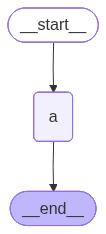

In [19]:
from langgraph.graph import END, START, StateGraph

builder = StateGraph(State)
builder.add_node("a", node_a)

builder.add_edge(START, "a")
builder.add_edge("a", END)

graph = builder.compile()
graph

You can pass information through the compiled state graph by invoking it and passing data there.

In [20]:
graph.invoke(initial_state)

['value']


{'n_list': ['returns']}